In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data=pd.read_excel("india covid data train.xlsx")
data.tail()

,iso_code,continent,location,Number of Days from First case,date,total_cases,new_cases,total_deaths,new_deaths
697,IND,Asia,India,698,2021-12-27,34799691,6358,480290,293.0
698,IND,Asia,India,699,2021-12-28,34808886,9195,480592,302.0
699,IND,Asia,India,700,2021-12-29,34822040,13154,480860,268.0
700,IND,Asia,India,701,2021-12-30,34838804,16764,481080,220.0
701,IND,Asia,India,702,2021-12-31,34861579,22775,481486,406.0


In [5]:
data.describe()

,Number of Days from First case,total_cases,new_cases,total_deaths,new_deaths
count,702.000000,7.020000e+02,702.000000,702.000000,700.000000
mean,351.500000,1.467145e+07,49660.368946,197370.715100,677.304286
std,202.794231,1.332211e+07,75949.115832,173518.394183,920.705303
min,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,176.250000,1.300337e+06,10247.250000,30790.250000,158.250000
50%,351.500000,1.053526e+07,26336.500000,152005.500000,391.500000
75%,526.750000,3.078502e+07,51649.250000,406843.500000,758.250000
max,702.000000,3.486158e+07,414188.000000,481486.000000,4529.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   iso_code                        702 non-null    object        
 1   continent                       702 non-null    object        
 2   location                        702 non-null    object        
 3   Number of Days from First case  702 non-null    int64         
 4   date                            702 non-null    datetime64[ns]
 5   total_cases                     702 non-null    int64         
 6   new_cases                       702 non-null    int64         
 7   total_deaths                    702 non-null    int64         
 8   new_deaths                      700 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 49.5+ KB


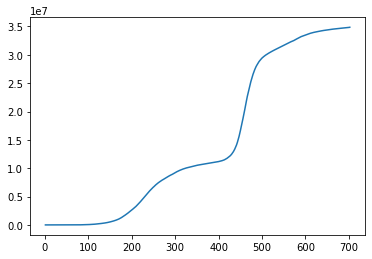

In [4]:
plt.plot(data['Number of Days from First case'],data['total_cases'])

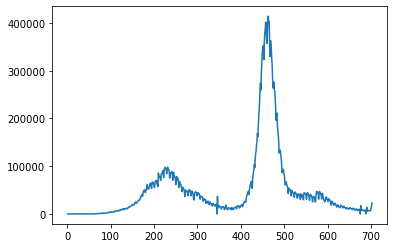

In [7]:
plt.plot(data['Number of Days from First case'],data['new_cases'])

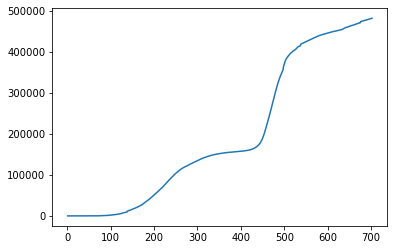

In [8]:
plt.plot(data['Number of Days from First case'],data['total_deaths'])

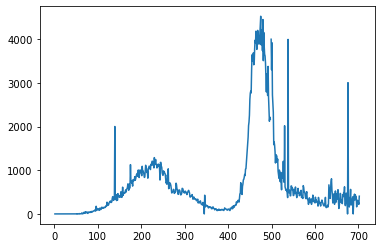

In [9]:
plt.plot(data['Number of Days from First case'],data['new_deaths'])

In [10]:
data.describe()

,Number of Days from First case,total_cases,new_cases,total_deaths,new_deaths
count,702.000000,7.020000e+02,702.000000,702.000000,700.000000
mean,351.500000,1.467145e+07,49660.368946,197370.715100,677.304286
std,202.794231,1.332211e+07,75949.115832,173518.394183,920.705303
min,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,176.250000,1.300337e+06,10247.250000,30790.250000,158.250000
50%,351.500000,1.053526e+07,26336.500000,152005.500000,391.500000
75%,526.750000,3.078502e+07,51649.250000,406843.500000,758.250000
max,702.000000,3.486158e+07,414188.000000,481486.000000,4529.000000


In [11]:
corr=data.corr()
corr.style.background_gradient(cmap='Greens')

,Number of Days from First case,total_cases,new_cases,total_deaths,new_deaths
Number of Days from First case,1.000000,0.958914,0.181024,0.962529,0.226175
total_cases,0.958914,1.000000,0.139696,0.996364,0.244199
new_cases,0.181024,0.139696,1.000000,0.076416,0.857006
total_deaths,0.962529,0.996364,0.076416,1.000000,0.180230
new_deaths,0.226175,0.244199,0.857006,0.180230,1.000000


In [12]:
X=data[['Number of Days from First case','total_deaths']].values
y=data['total_cases'].values

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = .75, test_size=0.25,random_state=7)
#x_train, y_train
#x_train = x_train.reshape(-1,1)
#x_test = x_test.reshape(-1,1)

In [35]:
model=LinearRegression()

In [36]:
model.fit(x_train, y_train)

LinearRegression()

In [37]:
y_predicted=model.predict(x_test)

In [38]:
model.score(x_test, y_test)

0.9171490528424944

In [39]:
#plt.scatter(x_test,y_predicted)
#plt.scatter(x_test,y_test)

In [40]:
df=pd.read_excel("india covid data test.xlsx")
df.head()

,iso_code,continent,location,Number of Days from First case,date,total_cases,new_cases,total_deaths,new_deaths
0,IND,Asia,India,703,2022-01-01,34889132,27553,481770,284
1,IND,Asia,India,704,2022-01-02,34922882,33750,481893,123
2,IND,Asia,India,705,2022-01-03,34960261,37379,482017,124
3,IND,Asia,India,706,2022-01-04,35018358,58097,482551,534
4,IND,Asia,India,707,2022-01-05,35109286,90928,482876,325


In [41]:
X=df[['Number of Days from First case','total_deaths']].values
#.reshape(-1,1)
y=df['total_cases'].values

In [42]:
y_pred=model.predict(X)

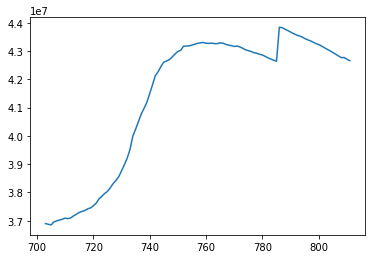

In [49]:
#plt.plot(df['Number of Days from First case'],df['total_cases'])
plt.plot(df['Number of Days from First case'],y_pred)

In [44]:
model.score(X,y)

0.8780192851877762

In [45]:
y_pred

array([36897742.5713684 , 36874197.64996862, 36850960.98105818,
       36954107.83277798, 36992829.9142253 , 37024462.18841773,
       37050854.17029136, 37090192.75671734, 37073737.64257243,
       37097663.60453132, 37172451.22723165, 37228127.19559279,
       37293358.9911235 , 37326224.27527329, 37361555.57933785,
       37418772.81014571, 37452871.10425287, 37527350.47446387,
       37617242.46914196, 37772483.99156055, 37861451.2287706 ,
       37961823.80808634, 38035686.67331862, 38163493.72418576,
       38307021.65200938, 38422190.35081354, 38554004.68404213,
       38761032.62467019, 38974842.12006378, 39208996.27975392,
       39514973.26946078, 39987714.85590169, 40236973.38756961,
       40505960.07855541, 40770939.48717982, 40976117.91287181,
       41190543.91324407, 41495287.89299355, 41808971.19493398,
       42130052.55661857, 42271114.46452744, 42457489.48836961,
       42606874.21349069, 42652069.59721421, 42697573.23342705,
       42794555.03535998, 42899859.65450